# HW3

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('titanic_data.csv')

y = data.Survived
X = data.loc[:,'Pclass':"Fare"]
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [5]:
toy = data.head()
toy

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


# 3.1

Consider log-likelihood function:
$$\ell(\boldsymbol{\theta})=\sum_{i=1}^{\mathrm{N}} \mathrm{y}_{\mathrm{i}} \log \left(\frac{1}{1+e^{-\boldsymbol{\theta}^{\top} \mathbf{x}_{\mathrm{i}}}}\right)+\left(1-\mathrm{y}_{\mathrm{i}}\right) \log \left(\frac{1}{1+e^{\boldsymbol{\theta}^{\top} \mathbf{x}_{\mathbf{i}}}}\right)$$

In [6]:
def LogLik(theta):
    return X.dot(theta).dot(y) - np.log(np.exp(1 + X.dot(theta))).sum()
def Gr(theta):
    return (y - 1/(1 + np.exp(-X.dot(theta)))).dot(X)

In [7]:
def GD(steps, size, tol):
    i = 0
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    loglik = LogLik(theta)
    vec = [loglik]
    while i < steps:
        theta1 = theta + size*Gr(theta)
        vec.append(LogLik(theta1))
        
        if np.square((theta1 - theta)).sum() <= tol or np.square(vec[-1] - vec[-2])<= tol:
            print('Total %d' %i  ,'iteration')
            return theta1, vec
        
        theta = theta1
        i += 1
    
    print('Total %d' %i  ,'iteration')
    return theta, vec

In [8]:
theta, vec = GD(20000,1e-7, 1e-10)

Total 17155 iteration


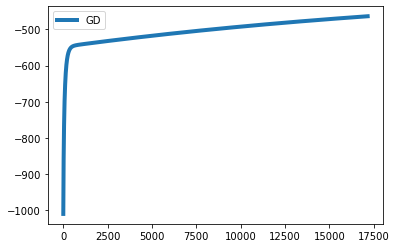

In [9]:
df = pd.DataFrame({"GD":vec})
df.plot.line(linewidth = 4)
None

In [10]:
theta

Pclass                    -0.157296
Sex                        0.691840
Age                       -0.022838
Siblings/Spouses Aboard   -0.128911
Parents/Children Aboard   -0.040576
Fare                       0.013129
dtype: float64

## (a)

I choose constant stepsize as $10^{-7}$, the optimization process went pretty well. I've chosen some other stategies at the beginning, such as exact lone search/ learning rate decay， momentum method, or some other methods involving second gradient. The method involving learn search didn't get good result and usually requires more iterations. The likelihood will fluctuate in some iterations. The method methods involving second gradient cost more time and computation complexity.

In the end, the constant stepsize showed the desired result.

## (b)

In [11]:
import time
start_time = time.time()
theta, vec = GD(20000,1e-7, 1e-10)
print("Total %s seconds elapsed" % (time.time() - start_time))

Total 17155 iteration
Total 28.299755096435547 seconds elapsed


**It took 28.30 seconds to complete the iteration. It took about 3 seconds to converge according to the loglikelihood plot.**

## (c)

In [12]:
theta

Pclass                    -0.157296
Sex                        0.691840
Age                       -0.022838
Siblings/Spouses Aboard   -0.128911
Parents/Children Aboard   -0.040576
Fare                       0.013129
dtype: float64

## (d)

In [13]:
vec[-1]

-463.53153422224244

## (e)

Using $\theta^\star$ to denote ture parameter.


Consider Fisher information:
$$
\mathbf{I}_{\boldsymbol{\theta}^{\star}}:=-\mathbb{E}\left[\left.\frac{\mathrm{d}^{2} \ell(\boldsymbol{\theta})}{\mathrm{d} \boldsymbol{\theta}^{2}}\right|_{\boldsymbol{\theta}=\boldsymbol{\theta}^{\star}}\right]=\mathbb{E}\left[\left.\sum_{\mathbf{i}=1}^{\mathrm{N}} \frac{e^{-\boldsymbol{\theta}^{\top} \mathbf{x}_{\mathbf{i}}}}{\left(1+e^{-\boldsymbol{\theta}^{\top} \mathbf{x}_{\mathbf{i}}}\right)^{2}} \mathbf{x}_{\mathbf{i}} \mathbf{x}_{\mathbf{i}}^{\top}\right|_{\boldsymbol{\theta}=\boldsymbol{\theta}^{\star}}\right]=\sum_{\mathbf{i}=1}^{\mathrm{N}} \frac{e^{-\boldsymbol{\theta}^{\star \top} \mathbf{x}_{\mathbf{i}}}}{\left(1+e^{-\boldsymbol{\theta}^{\star \top} \mathbf{x}_{\mathbf{i}}}\right)^{2}} \mathbf{x}_{\mathbf{i}} \mathbf{x}_{\mathbf{i}}^{\top}
$$

Let $$\hat{\boldsymbol{\theta}}:=\underset{\boldsymbol{\theta} \in \mathbb{R}^{\mathrm{D}+1}}{\arg \max } \ell(\boldsymbol{\theta})$$



Suppose $\frac{\mathrm{d}^{2} \ell(\boldsymbol{\theta})}{\mathrm{d} \boldsymbol{\theta}^{2}}$. Then we have:



$$
\hat{\boldsymbol{\theta}} \stackrel{d}{\longrightarrow} \mathcal{N}\left(\boldsymbol{\theta}^{\star},\mathbf{I}_{\boldsymbol{\theta}^{\star}}^{-1}\right)
$$

According to computation, we have:

In [14]:
def I(theta):
    W = np.diag(np.exp(-X.dot(theta))/(1 + np.exp(-X.dot(theta)))**2)
    return X.T.dot(W).dot(X)

In [15]:
var = np.linalg.inv(I(theta))

Then we have:

$$
\hat{\boldsymbol{\theta}} \stackrel{d}{\longrightarrow} \mathcal{N}\left(\boldsymbol{\theta}^{\star},\mathbf{I}_{\hat{\boldsymbol{\theta}}}^{-1}\right)
$$

where $\mathbf{I}_{\hat{\boldsymbol{\theta}}}^{-1}$ is

In [16]:
var

array([[ 3.21359720e-03, -1.96270908e-03, -1.94319179e-04,
        -1.48733570e-03, -1.01101582e-03,  5.15191289e-05],
       [-1.96270908e-03,  2.37288881e-02, -3.72060099e-05,
         1.08457571e-04, -2.95630615e-03, -7.20737802e-05],
       [-1.94319179e-04, -3.72060099e-05,  2.19491616e-05,
         1.01031536e-04,  6.98258066e-05, -7.11340387e-06],
       [-1.48733570e-03,  1.08457571e-04,  1.01031536e-04,
         5.81895119e-03, -2.23402533e-03, -6.34861528e-05],
       [-1.01101582e-03, -2.95630615e-03,  6.98258066e-05,
        -2.23402533e-03,  1.05884034e-02, -5.48940130e-05],
       [ 5.15191289e-05, -7.20737802e-05, -7.11340387e-06,
        -6.34861528e-05, -5.48940130e-05,  6.73377556e-06]])

# 3.2

Consider  the the log-odds are defined as
$$
\omega^{\star}:=\log \left(\frac{\mathbb{P}(y=1 \mid \mathbf{x})}{\mathbb{P}(y=0 \mid \mathbf{x})}\right)=\boldsymbol{\theta}^{\star \top} \mathbf{x}
$$

By the invariance property of the MLE, we know that the MLE of $\omega^{\star}$ is given by

$$
\hat{\omega}:=\hat{\boldsymbol{\theta}}^{\top} \mathbf{x}
$$

We further have:

$$
\hat{\omega} \stackrel{d}{\longrightarrow} \mathcal{N}\left(\omega^{\star}, \mathbf{x}^{\top} \mathbf{I}_{\boldsymbol{\theta}^{\star}}^{-1} \mathbf{x}\right)
$$

# 3.3

My own feature would be Plass:3, Gender:0, Age:23, Siblings:0, Parents/Children:0, Fare: 7.25.

In [17]:
x = np.array([3,0,23,0,0,7.25])

In [18]:
ome_hat = 1 / (1 + np.exp(theta.dot(x)))
ome_hat

0.7113562614023329

## (a)

since 0.66>0.5. According to (6.7) in lecture notes, I will survive the Titanic sinking.

## (b)

According to:
$$\mathbb{P}\left(\left|\hat{\omega}-\omega^{\star}\right|>\tau\right)=2 \Phi\left(\tau \mid 0, \mathbf{x}^{\top} \mathbf{I}_{\boldsymbol{\theta}^{\star}}^{-1} \mathbf{x}\right)$$

In [19]:
np.linalg.inv(I(theta)).dot(x).dot(x)

0.013940140637597352

$$
\tau=\Phi^{-1}\left(\alpha / 2 \mid 0,\mathbf{x}^{\top} \mathbf{I}_{\boldsymbol{\theta}^{\star}}^{-1} \mathbf{x}\right)
$$

When $\alpha = 0.05$, the $\tau$ I compute based on my estimated variance is 0.2245956.

In [20]:
ome_hat - 0.2245956

0.4867606614023329

In [21]:
ome_hat + 0.2245956

0.9359518614023329

Then the 95% confidence interval would be [0.487,0.936]

## (c)

I think my answer from (a) is fairly certain. In (a) I compute estimated probablity larger than 1/2. In (c) I got my 95% confidence interval. Most of my interval lies in [0.5,1], so I think the interval I got coincides with the answer I got from (a).

## 3.4

## (a)

Consider LRT test:
$$
\frac{\mathbb{P}\left(\hat{\theta}_{\mathrm{j}} \mid \theta_{\mathrm{j}}^{\star} \neq 0\right)}{\mathbb{P}\left(\hat{\theta}_{\mathrm{j}} \mid \theta_{\mathrm{j}}^{\star}=0\right)} \quad \gtrless_{H_{0}}^{H_{1}} 1
$$

$$
\left(\frac{\hat{\theta}_{\mathrm{j}}}{\nu_{\mathrm{j}}}\right)^{2} \gtrless_{H_{0}}^{H_{1}}  2 \log \tau
$$

The quantile I calulated for chi-square distribution with df 1 is 3.841459.

In [22]:
np.square(theta/ np.diag(var)) > 3.841459

Pclass                     True
Sex                        True
Age                        True
Siblings/Spouses Aboard    True
Parents/Children Aboard    True
Fare                       True
dtype: bool

## (b)

According the result in (a), all the features are significant.

## (c)

Yes, the survival prediction is based on the feature prediction. If I change most significant feature in my feature vector, my survival prediction will change.